# التحدي: تحليل النصوص حول علم البيانات

> *في هذا الدفتر، نجرب استخدام رابط مختلف - مقال ويكيبيديا عن التعلم الآلي. يمكنك أن تلاحظ أن هذا المقال، على عكس علم البيانات، يحتوي على الكثير من المصطلحات، مما يجعل التحليل أكثر تعقيدًا. نحتاج إلى إيجاد طريقة أخرى لتنظيف البيانات بعد استخراج الكلمات المفتاحية، للتخلص من بعض التراكيب الشائعة ولكن غير ذات المعنى.*

في هذا المثال، دعونا نقوم بتمرين بسيط يغطي جميع خطوات عملية علم البيانات التقليدية. ليس عليك كتابة أي كود، يمكنك فقط النقر على الخلايا أدناه لتنفيذها وملاحظة النتيجة. كجزء من التحدي، يُشجَّعك على تجربة هذا الكود مع بيانات مختلفة.

## الهدف

في هذا الدرس، كنا نتحدث عن مفاهيم مختلفة تتعلق بعلم البيانات. دعونا نحاول اكتشاف المزيد من المفاهيم ذات الصلة من خلال القيام ببعض **التنقيب عن النصوص**. سنبدأ بنص حول علم البيانات، نستخرج منه الكلمات المفتاحية، ثم نحاول تصور النتيجة.

كنص، سأستخدم صفحة علم البيانات من ويكيبيديا:


In [2]:
url = 'https://en.wikipedia.org/wiki/Data_science'
url = 'https://en.wikipedia.org/wiki/Machine_learning'

## الخطوة 1: الحصول على البيانات

أول خطوة في أي عملية علم بيانات هي الحصول على البيانات. سنستخدم مكتبة `requests` للقيام بذلك:


In [3]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Machine learning - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"77162785-16e9-4d7f-a175-7f3fcf502a66","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Machine_learning","wgTitle":"Machine learning","wgCurRevisionId":1041247229,"wgRevisionId":1041247229,"wgArticleId":233488,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 errors: missing periodical","Harv and Sfn no-target errors","CS1 maint: uses authors parameter","Articles with short description","Short description is dif

## الخطوة 2: تحويل البيانات

الخطوة التالية هي تحويل البيانات إلى الشكل المناسب للمعالجة. في حالتنا، قمنا بتنزيل الشيفرة المصدرية لـ HTML من الصفحة، ونحتاج إلى تحويلها إلى نص عادي.

هناك العديد من الطرق التي يمكن من خلالها القيام بذلك. سنستخدم أبسط كائن مدمج [HTMLParser](https://docs.python.org/3/library/html.parser.html) من بايثون. نحتاج إلى إنشاء فئة فرعية من `HTMLParser` وتعريف الشيفرة التي ستجمع كل النصوص داخل علامات HTML، باستثناء علامات `<script>` و `<style>`.


In [4]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Machine learning - Wikipedia Machine learning From Wikipedia, the free encyclopedia Jump to navigation Jump to search Study of algorithms that improve automatically through experience For the journal, see  Machine Learning (journal) . "Statistical learning" redirects here. For statistical learning in linguistics, see  statistical learning in language acquisition . Part of a series on Artificial intelligence Major goals Artificial general intelligence Planning Computer vision General game playing Knowledge reasoning Machine learning Natural language processing Robotics Approaches Symbolic Deep learning Bayesian networks Evolutionary algorithms Philosophy Ethics Existential risk Turing test Chinese room Control problem Friendly AI History Timeline Progress AI winter Technology Applications Projects Programming languages Glossary Glossary v t e Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection Data Cleaning AutoML Associ

## الخطوة 3: الحصول على رؤى

الخطوة الأهم هي تحويل بياناتنا إلى شكل يمكننا من خلاله استنتاج رؤى. في حالتنا، نريد استخراج الكلمات المفتاحية من النص، ومعرفة أي الكلمات المفتاحية أكثر أهمية.

سنستخدم مكتبة بايثون تُسمى [RAKE](https://github.com/aneesha/RAKE) لاستخراج الكلمات المفتاحية. أولاً، دعونا نقوم بتثبيت هذه المكتبة في حال لم تكن موجودة:


In [5]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


الوظيفة الرئيسية متاحة من كائن `Rake`، والذي يمكننا تخصيصه باستخدام بعض المعلمات. في حالتنا، سنقوم بتعيين الحد الأدنى لطول الكلمة الرئيسية إلى 5 أحرف، والحد الأدنى لتكرار الكلمة الرئيسية في المستند إلى 3، والحد الأقصى لعدد الكلمات في الكلمة الرئيسية إلى 2. لا تتردد في تجربة قيم أخرى وملاحظة النتيجة.


In [6]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('data mining', 4.0),
 ('polynomial time', 4.0),
 ('dimensionality reduction', 4.0),
 ('anomaly detection', 4.0),
 ('data set', 4.0),
 ('bayesian networks', 4.0),
 ('language corpora', 4.0),
 ('mcgraw hill', 4.0),
 ('mit press', 4.0),
 ('retrieved 2018-08-20', 4.0),
 ('artificial neuron', 3.9642857142857144),
 ('statistical learning', 3.9470198675496686),
 ('feature learning', 3.9470198675496686),
 ('reinforcement learning', 3.9470198675496686),
 ('deep learning', 3.9470198675496686),
 ('main article', 3.9411764705882355),
 ('machine learning', 3.9144111718974948),
 ('pattern recognition', 3.9),
 ('neural networks', 3.875),
 ('artificial intelligence', 3.864285714285714),
 ('supervised learning', 3.835908756438558),
 ('speech recognition', 3.833333333333333),
 ('bayesian network', 3.833333333333333),
 ('explicitly programmed', 3.8),
 ('biological brain', 3.8),
 ('unsupervised learning', 3.780353200883002),
 ('outlier detection', 3.75),
 ('ieee transactions', 3.75),
 ('isbn 978-0-262-0

حصلنا على قائمة بالمصطلحات مع درجة الأهمية المرتبطة بها. كما ترى، فإن التخصصات الأكثر صلة، مثل تعلم الآلة والبيانات الضخمة، تظهر في المراكز الأولى من القائمة.

## الخطوة 4: تصور النتيجة

يمكن للناس فهم البيانات بشكل أفضل عندما تكون في شكل مرئي. لذلك، غالبًا ما يكون من المنطقي تصور البيانات لاستخلاص بعض الأفكار. يمكننا استخدام مكتبة `matplotlib` في بايثون لرسم توزيع بسيط للكلمات المفتاحية مع مدى أهميتها:


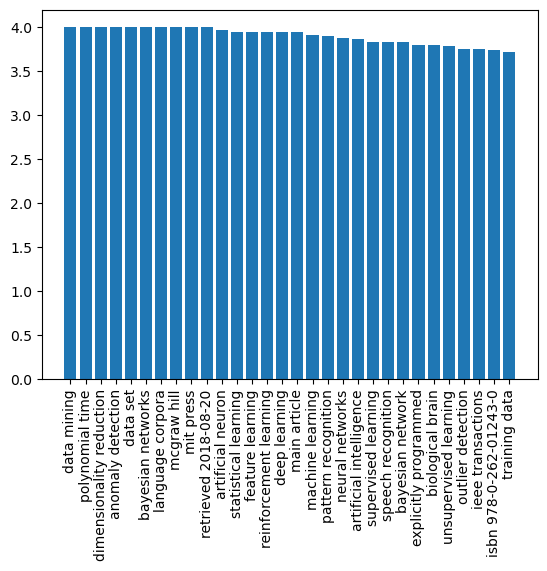

In [9]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res[:30])

هناك، مع ذلك، طريقة أفضل لتصور تكرار الكلمات - باستخدام **سحابة الكلمات**. سنحتاج إلى تثبيت مكتبة أخرى لرسم سحابة الكلمات من قائمة الكلمات الرئيسية الخاصة بنا.


In [71]:
!{sys.executable} -m pip install wordcloud

`كائن WordCloud مسؤول عن استلام النص الأصلي أو قائمة الكلمات المحسوبة مسبقًا مع تردداتها، ويعيد صورة يمكن عرضها باستخدام matplotlib:`


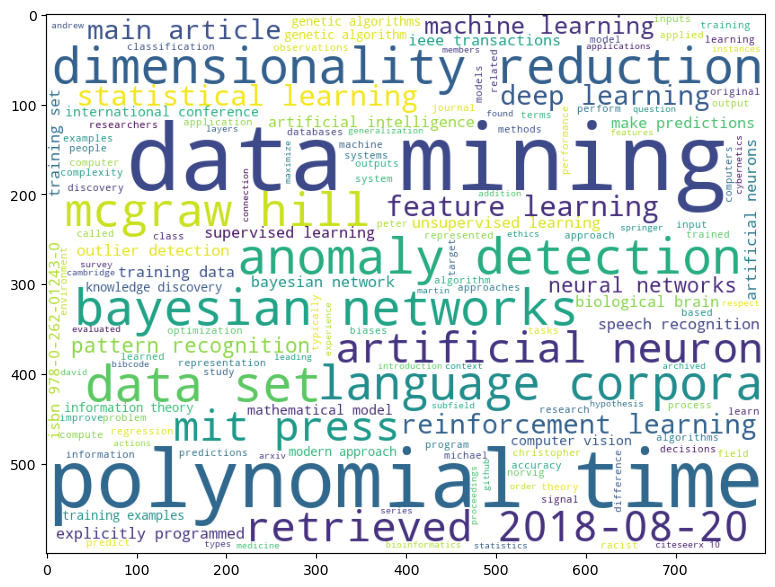

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))
plt.show()

يمكننا أيضًا تمرير النص الأصلي إلى `WordCloud` - لنرى ما إذا كنا قادرين على الحصول على نتيجة مشابهة:


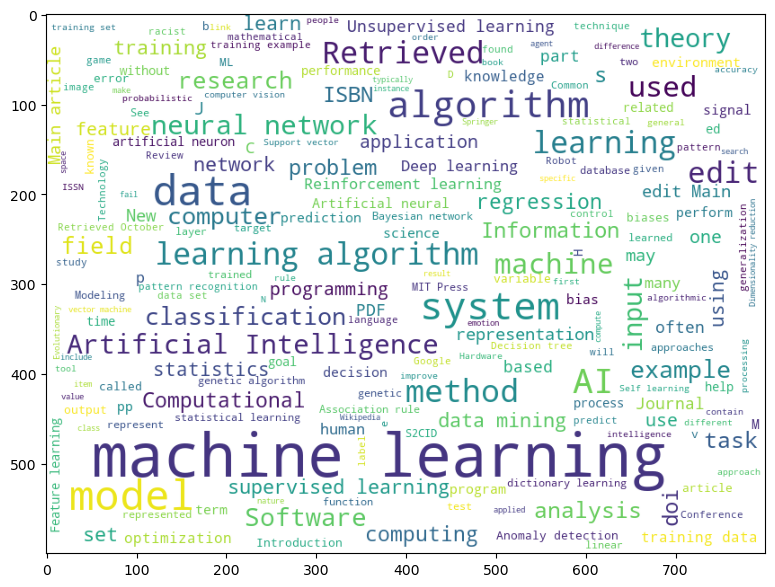

In [13]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))
plt.show()

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

يمكنك أن ترى أن سحابة الكلمات أصبحت الآن أكثر جاذبية، لكنها تحتوي أيضًا على الكثير من الضوضاء (مثل كلمات غير ذات صلة مثل `Retrieved on`). بالإضافة إلى ذلك، نحصل على عدد أقل من الكلمات المفتاحية التي تتكون من كلمتين، مثل *عالم بيانات* أو *علوم الحاسوب*. السبب في ذلك هو أن خوارزمية RAKE تقوم بعمل أفضل بكثير في اختيار الكلمات المفتاحية الجيدة من النص. يوضح هذا المثال أهمية معالجة البيانات وتنظيفها، لأن الصورة الواضحة في النهاية ستسمح لنا باتخاذ قرارات أفضل.

في هذا التمرين، قمنا بعملية بسيطة لاستخراج بعض المعاني من نصوص ويكيبيديا، على شكل كلمات مفتاحية وسحابة كلمات. هذا المثال بسيط جدًا، لكنه يوضح بشكل جيد جميع الخطوات النموذجية التي يقوم بها عالم البيانات عند العمل مع البيانات، بدءًا من الحصول على البيانات وصولاً إلى التصور.

في دورتنا، سنناقش جميع هذه الخطوات بالتفصيل.



---

**إخلاء المسؤولية**:  
تم ترجمة هذا المستند باستخدام خدمة الترجمة بالذكاء الاصطناعي [Co-op Translator](https://github.com/Azure/co-op-translator). بينما نسعى لتحقيق الدقة، يرجى العلم أن الترجمات الآلية قد تحتوي على أخطاء أو معلومات غير دقيقة. يجب اعتبار المستند الأصلي بلغته الأصلية المصدر الرسمي. للحصول على معلومات حاسمة، يُوصى بالاستعانة بترجمة بشرية احترافية. نحن غير مسؤولين عن أي سوء فهم أو تفسيرات خاطئة تنشأ عن استخدام هذه الترجمة.
